<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-19 06:44:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  60.4MB/s    in 3.3s    

2025-04-19 06:44:38 (60.6 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [3]:
!pip install pandas

In [4]:
!pip install matplotlib

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


<Axes: >

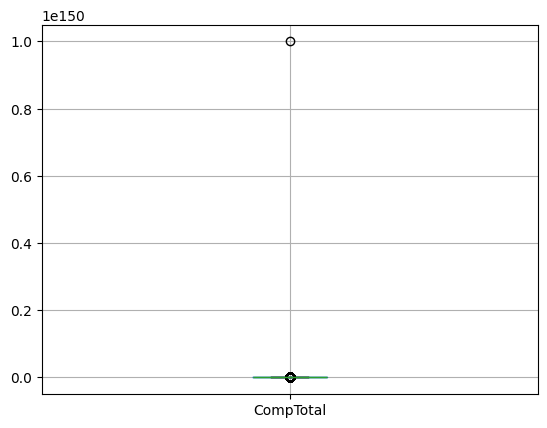

In [9]:
# your code goes here
# your code goes here
QUERY = """
SELECT * FROM main
"""
df = pd.read_sql_query(QUERY,conn)
df.boxplot(column='CompTotal')


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


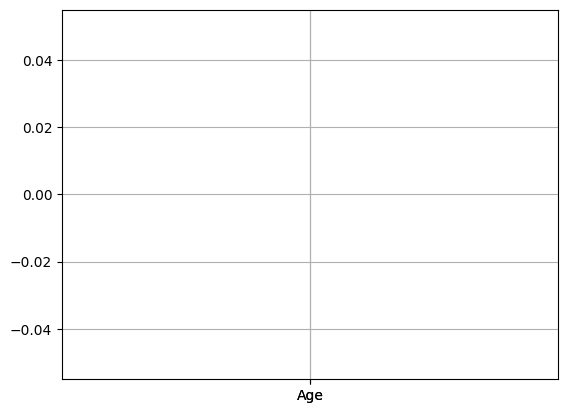

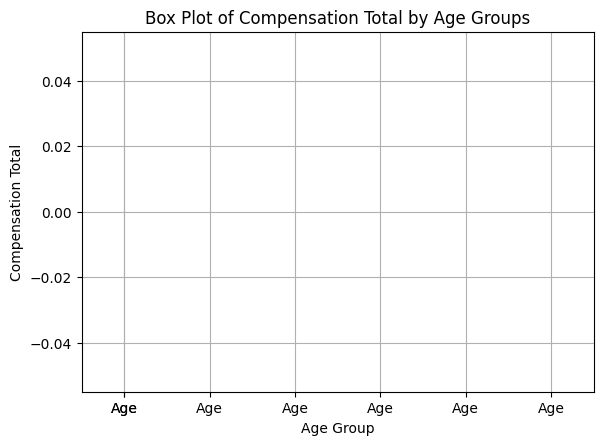

In [14]:
# First, fetch the data from the database
QUERY = """
SELECT * FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Now convert the Age column to numerical values
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Convert Age to numeric, invalid parsing will be set to NaN

# Visualize the distribution of Age using a boxplot
df.boxplot(column='Age')
plt.title('Box Plot of Compensation Total by Age Groups')
plt.suptitle('')  # Remove the default title created by boxplot
plt.xlabel('Age Group')
plt.ylabel('Compensation Total')
plt.show()




### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<Figure size 1000x600 with 0 Axes>

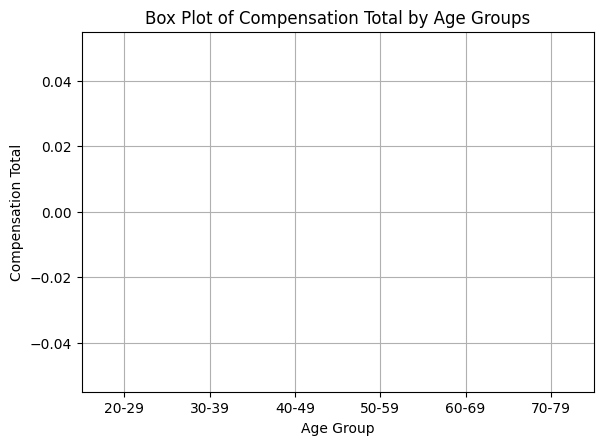

In [15]:
# First, fetch the data from the database
QUERY = """
SELECT * FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Convert the Age column to numeric values
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Convert Age to numeric, invalid parsing will be set to NaN

# Create age bins and labels
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Assign the corresponding age group to each row
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Now, visualize the distribution of compensation (CompTotal) across different age groups using a boxplot
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
df.boxplot(column='CompTotal', by='AgeGroup', patch_artist=True)
plt.title('Box Plot of Compensation Total by Age Groups')
plt.suptitle('')  # Remove the default title created by boxplot
plt.xlabel('Age Group')
plt.ylabel('Compensation Total')
plt.show()



**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Figure size 1000x600 with 0 Axes>

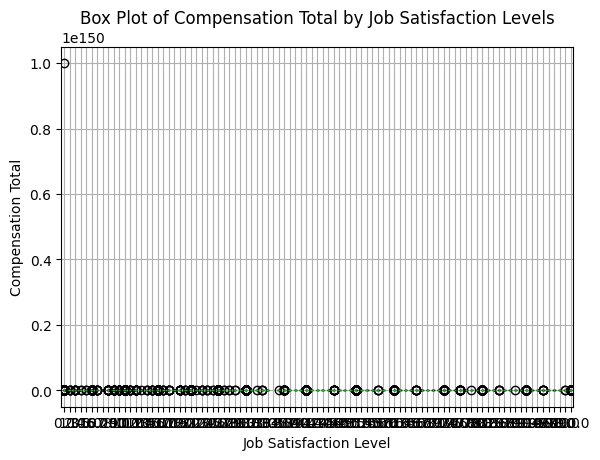

In [16]:

# your code goes here
# First, fetch the data from the database
QUERY = """
SELECT * FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Convert the Age and JobSatPoints_6 columns to numeric values (if necessary)
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')  # Convert to numeric, invalid parsing will be set to NaN
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')  # Ensure CompTotal is numeric

# Now, visualize the distribution of compensation (CompTotal) based on JobSatPoints_6 using a boxplot
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
df.boxplot(column='CompTotal', by='JobSatPoints_6', patch_artist=True)
plt.title('Box Plot of Compensation Total by Job Satisfaction Levels')
plt.suptitle('')  # Remove the default title created by boxplot
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Compensation Total')
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1200x600 with 0 Axes>

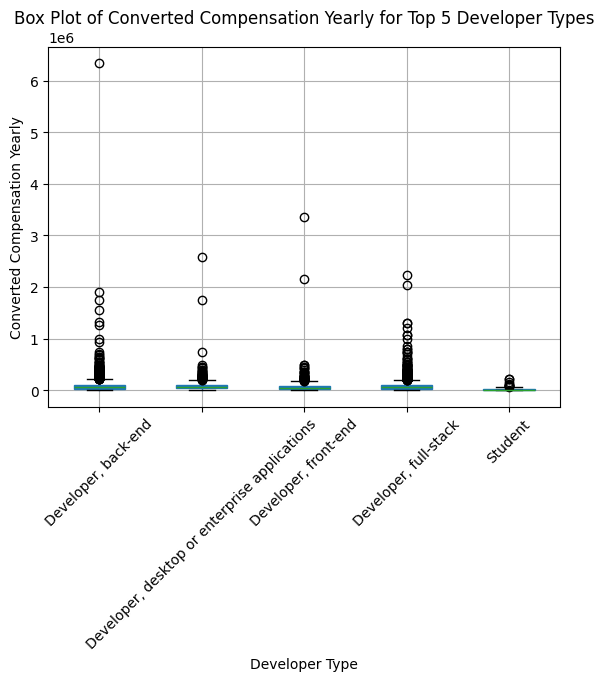

In [17]:
# your code goes here
# First, fetch the data from the database
QUERY = """
SELECT * FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Convert the 'ConvertedCompYearly' column to numeric values
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Handle the 'DevType' column to identify the top 5 developer types
# Count the number of occurrences of each developer type
top_dev_types = df['DevType'].value_counts().nlargest(5).index

# Filter the dataset for the top 5 developer types
df_top_dev_types = df[df['DevType'].isin(top_dev_types)]

# Now, create the box plot for 'ConvertedCompYearly' across these top 5 developer types
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_top_dev_types.boxplot(column='ConvertedCompYearly', by='DevType', patch_artist=True)
plt.title('Box Plot of Converted Compensation Yearly for Top 5 Developer Types')
plt.suptitle('')  # Remove the default title created by boxplot
plt.xlabel('Developer Type')
plt.ylabel('Converted Compensation Yearly')
plt.xticks(rotation=45)
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [ ]:
# your code goes here
# First, fetch the data from the database
QUERY = """
SELECT * FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Convert the 'CompTotal' column to numeric values
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Handle the 'Country' column to identify the top 5 countries
# Count the number of occurrences of each country
top_countries = df['Country'].value_counts().nlargest(5).index

# Filter the dataset for the top 5 countries
df_top_countries = df[df['Country'].isin(top_countries)]

# Now, create the box plot for 'CompTotal' across these top 5 countries
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_top_countries.boxplot(column='CompTotal', by='Country', patch_artist=True)
plt.title('Box Plot of Total Compensation for Top 5 Countries')
plt.suptitle('')  # Remove the default title created by boxplot
plt.xlabel('Country')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45)
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [ ]:
# your code goes here

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [ ]:
# your code goes here

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
